In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import scipy.sparse
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

from scipy.optimize import curve_fit

# generate plot from pre-evaluated data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

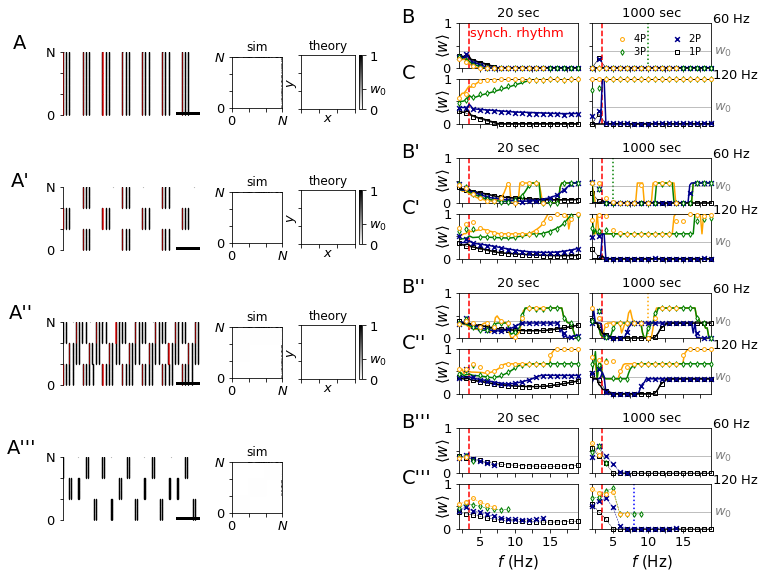

In [3]:
# complete decoupling
# only tree network
labelFontsize = 15
ticksFontsize = 13
fontsizePanelLabels = 1.3*labelFontsize


# left
xl1 = 0.05
xl2 = 0.24
xl3a = 0.275 + 0.01
xl3b = 0.345 + 0.01
xl4a = 0.38 - 0.02 # - 0.03
xl4b = 0.45+0.05 - 0.02 # - 0.03

# right
xr1 = xl1+0.5
xr2 = xl2+0.5
xr3a = xl3a+0.5
xr3b = xl3b+0.5
xr4a = xl4a+0.5
xr4b = xl4b+0.5

# y-values
Dy=0.35
yGap = 0.4
DyMat = 0.1

# top
y6 = 0.95
y5 = y6-Dy

y6b = y6 - 0.02
y6a = y6b - DyMat
y5b = y6a - DyMat
y5a = y5b - DyMat

# middle
y4 = y5-yGap
y3 = y4-Dy

y4b = y4 - 0.02
y4a = y4b - DyMat
y3b = y4a - DyMat
y3a = y3b - DyMat

# bottom
y2 = y3-yGap
y1 = y2-Dy

y2b = y2 - 0.02
y2a = y2b - DyMat
y1b = y2a - DyMat
y1a = y1b - DyMat

# CR RVS
y0 = y1-yGap
ym1 = y0-Dy

y0b = y0 - 0.02
y0a = y0b - DyMat
ym1b = y0a - DyMat
ym1a = ym1b - DyMat


Dy2=0.25     # height of mw as function of frequency panel
yGap2 = 0.06  # gap between of mw as function of frequency panels
ytop_mwf = y5-0.05
ycenter_mwf = y3-0.05
ybottom_mwf = y1-0.05
yCRRVS_mwf = ym1-0.05
xleft = 0.6
xright = 0.765
xleft2 = 0.785
xright2 = 0.95

correctionAxesTheory = 0.0

xPanelLabelLeft = 3999.05

##### illustration of  phase shifts
##########################################
### periodic stimulation
##########################################
# left
# spike trains
gs_trace_t_spk = gridspec.GridSpec(1, 1)
gs_trace_t_spk.update(top=y6, bottom=y5, left=xl1, right=xl2)
# weight matrix
gs_trace_t_wm = gridspec.GridSpec(1, 1)
gs_trace_t_wm.update(top=y6b, bottom=y5a, left=xl4a, right=xl4b)
# theory
gs_trace_t_wmTheory = gridspec.GridSpec(1, 1)
gs_trace_t_wmTheory.update(top=y6b, bottom=y5a, left=xl3a, right=xl3b+correctionAxesTheory)
### short stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_t_wm_freq_low = gridspec.GridSpec(1, 1) 
gs_trace_t_wm_freq_low.update(top=ytop_mwf+2*Dy2+yGap2, bottom=ytop_mwf+Dy2+yGap2, left=xleft, right=xright)
# mean weight as function of frequency low intraburst frequency
gs_trace_t_wm_freq_high = gridspec.GridSpec(1, 1) 
gs_trace_t_wm_freq_high.update(top=ytop_mwf+Dy2, bottom=ytop_mwf, left=xleft, right=xright)
### long stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_t_wm_freq_low_long = gridspec.GridSpec(1, 1) 
gs_trace_t_wm_freq_low_long.update(top=ytop_mwf+2*Dy2+yGap2, bottom=ytop_mwf+Dy2+yGap2, left=xleft2, right=xright2)
# mean weight as function of frequency low intraburst frequency
gs_trace_t_wm_freq_high_long = gridspec.GridSpec(1, 1) 
gs_trace_t_wm_freq_high_long.update(top=ytop_mwf+Dy2, bottom=ytop_mwf, left=xleft2, right=xright2)


##########################################
### CR 2-1
##########################################
# spike trains
gs_trace_c_spk = gridspec.GridSpec(1, 1)
gs_trace_c_spk.update(top=y4, bottom=y3, left=xl1, right=xl2)
# weight matrix
gs_trace_c_wm = gridspec.GridSpec(1, 1)
gs_trace_c_wm.update(top=y4b, bottom=y3a, left=xl4a, right=xl4b)
# theory
gs_trace_c_wmTheory = gridspec.GridSpec(1, 1)
gs_trace_c_wmTheory.update(top=y4b, bottom=y3a, left=xl3a, right=xl3b+correctionAxesTheory)
### short stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_c_wm_freq_low_short = gridspec.GridSpec(1, 1) 
gs_trace_c_wm_freq_low_short.update(top=ycenter_mwf+2*Dy2+yGap2, bottom=ycenter_mwf+Dy2+yGap2, left=xleft, right=xright)
# mean weight as function of frequency low intraburst frequency
gs_trace_c_wm_freq_high_short = gridspec.GridSpec(1, 1) 
gs_trace_c_wm_freq_high_short.update(top=ycenter_mwf+Dy2, bottom=ycenter_mwf, left=xleft, right=xright)
### long stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_c_wm_freq_low_long = gridspec.GridSpec(1, 1) 
gs_trace_c_wm_freq_low_long.update(top=ycenter_mwf+2*Dy2+yGap2, bottom=ycenter_mwf+Dy2+yGap2, left=xleft2, right=xright2)
# mean weight as function of frequency low intraburst frequency
gs_trace_c_wm_freq_high_long = gridspec.GridSpec(1, 1) 
gs_trace_c_wm_freq_high_long.update(top=ycenter_mwf+Dy2, bottom=ycenter_mwf, left=xleft2, right=xright2)


##########################################
### CR 1,1,1
##########################################
# spike trains
gs_trace_b_spk = gridspec.GridSpec(1, 1)
gs_trace_b_spk.update(top=y2, bottom=y1, left=xl1, right=xl2)
# weight matrix
gs_trace_b_wm = gridspec.GridSpec(1, 1)
gs_trace_b_wm.update(top=y2b, bottom=y1a, left=xl4a, right=xl4b)
# theory
gs_trace_b_wmTheory = gridspec.GridSpec(1, 1)
gs_trace_b_wmTheory.update(top=y2b, bottom=y1a, left=xl3a, right=xl3b+correctionAxesTheory)
### short stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_b_wm_freq_low_short = gridspec.GridSpec(1, 1) 
gs_trace_b_wm_freq_low_short.update(top=ybottom_mwf+2*Dy2+yGap2, bottom=ybottom_mwf+Dy2+yGap2, left=xleft, right=xright)
# mean weight as function of frequency low intraburst frequency
gs_trace_b_wm_freq_high_short = gridspec.GridSpec(1, 1) 
gs_trace_b_wm_freq_high_short.update(top=ybottom_mwf+Dy2, bottom=ybottom_mwf, left=xleft, right=xright)
### long stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_b_wm_freq_low_long = gridspec.GridSpec(1, 1) 
gs_trace_b_wm_freq_low_long.update(top=ybottom_mwf+2*Dy2+yGap2, bottom=ybottom_mwf+Dy2+yGap2, left=xleft2, right=xright2)
# mean weight as function of frequency low intraburst frequency
gs_trace_b_wm_freq_high_long = gridspec.GridSpec(1, 1) 
gs_trace_b_wm_freq_high_long.update(top=ybottom_mwf+Dy2, bottom=ybottom_mwf, left=xleft2, right=xright2)


##########################################
### CR RVS
##########################################

# spike trains
gs_trace_CRRVS_spk = gridspec.GridSpec(1, 1)
gs_trace_CRRVS_spk.update(top=y0, bottom=ym1, left=xl1, right=xl2)
# weight matrix
gs_trace_CRRVS_wm = gridspec.GridSpec(1, 1)
gs_trace_CRRVS_wm.update(top=y0b, bottom=ym1a, left=xl4a, right=xl4b)
# theory
gs_trace_CRRVS_wmTheory = gridspec.GridSpec(1, 1)
gs_trace_CRRVS_wmTheory.update(top=y0b, bottom=ym1a, left=xl3a, right=xl3b+correctionAxesTheory)
### short stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_CRRVS_wm_freq_low_short = gridspec.GridSpec(1, 1) 
gs_trace_CRRVS_wm_freq_low_short.update(top=yCRRVS_mwf+2*Dy2+yGap2, bottom=yCRRVS_mwf+Dy2+yGap2, left=xleft, right=xright)
# mean weight as function of frequency low intraburst frequency
gs_trace_CRRVS_wm_freq_high_short = gridspec.GridSpec(1, 1) 
gs_trace_CRRVS_wm_freq_high_short.update(top=yCRRVS_mwf+Dy2, bottom=yCRRVS_mwf, left=xleft, right=xright)
### long stimulation duration
# mean weight as function of frequency high intraburst frequency
gs_trace_CRRVS_wm_freq_low_long = gridspec.GridSpec(1, 1) 
gs_trace_CRRVS_wm_freq_low_long.update(top=yCRRVS_mwf+2*Dy2+yGap2, bottom=yCRRVS_mwf+Dy2+yGap2, left=xleft2, right=xright2)
# mean weight as function of frequency low intraburst frequency
gs_trace_CRRVS_wm_freq_high_long = gridspec.GridSpec(1, 1) 
gs_trace_CRRVS_wm_freq_high_long.update(top=yCRRVS_mwf+Dy2, bottom=yCRRVS_mwf, left=xleft2, right=xright2)




### figure
fig = plt.figure( figsize = (10,2.5) )

M = 3


##############################
### top panel periodic stimulation
#############################################
# plot spike train 
# test plot_spiketrain_pulses_weights
parameters = {}
parameters[ 'seed' ] = 10
parameters[ 'ppb' ] = 3
parameters[ 'fCR' ] = 10.0 # Hz
parameters['f_intra'] = 60.0 # Hz
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0
parameters[ 'Astim' ] = 0.8
parameters[ 'teval sec' ] = 3020

parameters[ 'Dalpha1' ] = 0.0
parameters[ 'Dalpha2' ] = 0.0

ax_spk1 = fig.add_subplot( gs_trace_t_spk[0,0] )
ax_wM = fig.add_subplot( gs_trace_t_wm[0,0] )
ax_wMTheory = fig.add_subplot( gs_trace_t_wmTheory[0,0] )
ax_high_short = fig.add_subplot( gs_trace_t_wm_freq_high[0,0])
ax_low_short = fig.add_subplot( gs_trace_t_wm_freq_low[0,0] )
ax_high_long = fig.add_subplot( gs_trace_t_wm_freq_high_long[0,0])
ax_low_long = fig.add_subplot( gs_trace_t_wm_freq_low_long[0,0] )

ax_low_long.axvline(parameters[ 'fCR' ], color='green', ls=':')
#ax_high.axvline(parameters[ 'fCR' ], color='black', ls=':')

for ax in [ax_low_short,ax_high_short,ax_low_long,ax_high_long]:
    # mark target rhythm
    ax.axvline(3.5, color='red', ls='--')
    # mark initial mean weight
    ax.axhline(0.38, color='gray', ls='-', lw=0.5)


plot_spiketrain_pulses_weights( parameters, ax_spk1, ax_wMTheory, ax_wM, False)

Dalpha1, Dalpha2 = 0.0, 0.0

# mw( frequency ) plot for short stimulation durations
parameters[ 'teval sec' ] = 3020
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_short, ax_high_short, False, False, False, True )
 
# mw( frequency ) plot for long stimulation durations
parameters[ 'teval sec' ] = 4000
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_long, ax_high_long, False, False, True, False )

ax_low_long.legend( frameon = False, ncol=2, handletextpad=0.1, labelspacing = 0.1, loc=1 )


ax_low_short.text(3.6,0.7,'synch. rhythm', color='red', fontsize=ticksFontsize)

# panel label
ax_spk1.text( xPanelLabelLeft ,1050,'A', fontsize = fontsizePanelLabels )

ax_low_short.text(-6.2,1,'B', fontsize = fontsizePanelLabels )
ax_high_short.text(-6.2,1,'C', fontsize = fontsizePanelLabels )

ax_low_short.set_title('20 sec', fontsize = ticksFontsize)
ax_low_long.set_title('1000 sec', fontsize = ticksFontsize)

ax_wMTheory.set_title('sim')
ax_wM.set_title('theory')


#############################################
### center panel, anti-phase stimulation
#############################################
parameters[ 'seed' ] = 10
parameters[ 'ppb' ] = 3
parameters[ 'M' ] = 3
parameters[ 'Astim' ] = 0.8
parameters['f_intra'] = 60.0 # Hz
parameters[ 'fCR' ] = 5.0 # Hz
parameters[ 'de' ] = 1.0
parameters[ 'Dalpha1' ] = 0.5
parameters[ 'Dalpha2' ] = 0.5
parameters[ 'teval sec' ] = 3020


ax_spk = fig.add_subplot( gs_trace_c_spk[0,0] )
ax_wM = fig.add_subplot( gs_trace_c_wm[0,0] )
ax_wMTheory = fig.add_subplot( gs_trace_c_wmTheory[0,0] )
ax_high_short = fig.add_subplot( gs_trace_c_wm_freq_high_short[0,0])
ax_low_short = fig.add_subplot( gs_trace_c_wm_freq_low_short[0,0] )
ax_high_long = fig.add_subplot( gs_trace_c_wm_freq_high_long[0,0])
ax_low_long = fig.add_subplot( gs_trace_c_wm_freq_low_long[0,0] )

ax_low_long.axvline(parameters[ 'fCR' ], color='green', ls=':')
# ax_high.axvline(parameters[ 'fCR' ], color='black', ls=':')

for ax in [ax_low_short,ax_high_short,ax_low_long,ax_high_long]:
    # mark target rhythm
    ax.axvline(3.5, color='red', ls='--')
    # mark initial mean weight
    ax.axhline(0.38, color='gray', ls='-', lw=0.5)



plot_spiketrain_pulses_weights( parameters, ax_spk, ax_wMTheory, ax_wM, False)
# panel label
ax_spk.text( xPanelLabelLeft-0.01 ,1000,"A'", fontsize = fontsizePanelLabels )

# mw( frequency ) plot for short stimulation durations
parameters[ 'teval sec' ] = 3020
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_short, ax_high_short, False, False, False, True )
 
# mw( frequency ) plot for long stimulation durations
parameters[ 'teval sec' ] = 4000
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_long, ax_high_long, False, False, True, False )
 
      
        
ax_low_short.text(-6.2,1,"B'", fontsize = fontsizePanelLabels )
ax_high_short.text(-6.2,1,"C'", fontsize = fontsizePanelLabels )

ax_low_short.set_title('20 sec', fontsize = ticksFontsize)
ax_low_long.set_title('1000 sec', fontsize = ticksFontsize)

ax_wMTheory.set_title('sim')
ax_wM.set_title('theory')    
  

#############################################
### bottom row (CR) panel (short)
#############################################
# plot spike train 
# test plot_spiketrain_pulses_weights
parameters = {}
parameters[ 'seed' ] = 10
parameters[ 'Dalpha1' ] = 0.33
parameters[ 'Dalpha2' ] = 0.33
parameters[ 'ppb' ] = 4
parameters['f_intra'] = 60.0 # Hz
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0
parameters[ 'Astim' ] = 0.8

parameters[ 'fCR' ] = 10.0 # Hz

ax_spk = fig.add_subplot( gs_trace_b_spk[0,0] )
ax_wM = fig.add_subplot( gs_trace_b_wm[0,0] )
ax_wMTheory = fig.add_subplot( gs_trace_b_wmTheory[0,0] )

ax_high_short = fig.add_subplot( gs_trace_b_wm_freq_high_short[0,0])
ax_low_short = fig.add_subplot( gs_trace_b_wm_freq_low_short[0,0] )
ax_high_long = fig.add_subplot( gs_trace_b_wm_freq_high_long[0,0])
ax_low_long = fig.add_subplot( gs_trace_b_wm_freq_low_long[0,0] )

ax_low_long.axvline(parameters[ 'fCR' ], color='orange', ls=':')


for ax in [ax_low_short,ax_high_short,ax_low_long,ax_high_long]:
    # mark target rhythm
    ax.axvline(3.5, color='red', ls='--')
    # mark initial mean weight
    ax.axhline(0.38, color='gray', ls='-', lw=0.5)

# plot spike train
plot_spiketrain_pulses_weights( parameters, ax_spk, ax_wMTheory, ax_wM, False)

# mw( frequency ) plot for short stimulation durations
parameters[ 'teval sec' ] = 3020
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_short, ax_high_short, False, False, False, True )
 
### HIER WEITER
# plot Theory
# plot_mwTheory( ax_low_short, parameters[ 'teval sec' ], 'green' )  
             
    
    
# mw( frequency ) plot for long stimulation durations
parameters[ 'teval sec' ] = 4000
plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_long, ax_high_long, False, False, True, False )
 
    
# panel labels
ax_spk.text(3999.07+0.02-0.06,1050,"A''", fontsize = fontsizePanelLabels )

ax_low_short.text(-6.2,1,"B''", fontsize = fontsizePanelLabels )
ax_high_short.text(-6.2,1,"C''", fontsize = fontsizePanelLabels )
# ax_low_long.text(-2,1,"$(c'')$", fontsize = fontsizePanelLabels )
# ax_high_long.text(-2,1,"$(e'')$", fontsize = fontsizePanelLabels )

ax_low_short.set_title('20 sec', fontsize = ticksFontsize)
ax_low_long.set_title('1000 sec', fontsize = ticksFontsize)

ax_wMTheory.set_title('sim')
ax_wM.set_title('theory')




#############################################
### CR RVS
#############################################
parameters = {}

parameters[ 'seed' ] = 10
parameters[ 'fCR' ] = 8.0 # Hz 
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0 
parameters[ 'f_intra' ] = 120.0 # Hz 
parameters[ 'Astim' ] = 0.8
parameters[ 'ppb'] = 2
parameters[ 'teval sec' ] = 4000

ax_spk = fig.add_subplot( gs_trace_CRRVS_spk[0,0] )
# ax_wM = fig.add_subplot( gs_trace_CRRVS_wm[0,0] )
ax_wMTheory = fig.add_subplot( gs_trace_CRRVS_wmTheory[0,0] )

ax_high_short = fig.add_subplot( gs_trace_CRRVS_wm_freq_high_short[0,0])
ax_low_short = fig.add_subplot( gs_trace_CRRVS_wm_freq_low_short[0,0] )
ax_high_long = fig.add_subplot( gs_trace_CRRVS_wm_freq_high_long[0,0])
ax_low_long = fig.add_subplot( gs_trace_CRRVS_wm_freq_low_long[0,0] )


# mark frequency value used in spike trains
ax_high_long.axvline(parameters[ 'fCR' ], color='blue', ls=':')


for ax in [ax_low_short,ax_high_short,ax_low_long,ax_high_long]:
    # mark target rhythm
    ax.axvline(3.5, color='red', ls='--')
    # mark initial mean weight
    ax.axhline(0.38, color='gray', ls='-', lw=0.5)

    
# plot spike train for CR RVS
plot_spiketrain_pulses_weights_CRRVS( parameters, ax_spk, ax_wMTheory , ax_wM , False)
    
# mw( frequency ) plot for short stimulation durations
parameters[ 'teval sec' ] = 3020
plotFrequencyDependence_CRRVS( parameters, ax_low_short, ax_high_short, True, False, False, True )

# mw( frequency ) plot for long stimulation durations
parameters[ 'teval sec' ] = 4000
plotFrequencyDependence_CRRVS( parameters, ax_low_long, ax_high_long, True, False, True, False )

    
# panel labels
ax_spk.text(3999.07+0.02-0.07,1050,"A'''", fontsize = fontsizePanelLabels )

ax_low_short.text(-6.2,1,"B'''", fontsize = fontsizePanelLabels )
ax_high_short.text(-6.2,1,"C'''", fontsize = fontsizePanelLabels )

ax_wMTheory.set_title('sim')
# ax_wM.set_title('theory')    
    
    
# # plot spike train 
# # test plot_spiketrain_pulses_weights
# parameters = {}
# parameters[ 'seed' ] = 10
# parameters[ 'Dalpha1' ] = 0.33
# parameters[ 'Dalpha2' ] = 0.33
# parameters[ 'ppb' ] = 4
# parameters['f_intra'] = 60.0 # Hz
# parameters[ 'M' ] = 3
# parameters[ 'de' ] = 1.0
# parameters[ 'Astim' ] = 0.8

# parameters[ 'fCR' ] = 10.0 # Hz
    
    
    
    
# # plot spike train
# plot_spiketrain_pulses_weights( parameters, ax_spk, ax_wMTheory, ax_wM, False)


# ### HIER WEITER
# # plot Theory
# # plot_mwTheory( ax_low_short, parameters[ 'teval sec' ], 'green' )  
             
    
    
# # mw( frequency ) plot for long stimulation durations
# parameters[ 'teval sec' ] = 4000
# plotFrequencyDependence( parameters[ 'Dalpha1' ], parameters[ 'Dalpha2' ], ax_low_long, ax_high_long, True, False, True, False )
 
    
# # panel labels
# ax_spk.text(3999.07+0.02-0.04,1050,"$(a'')$", fontsize = fontsizePanelLabels )

# ax_low_short.text(-7,1,"$(b'')$", fontsize = fontsizePanelLabels )
# ax_high_short.text(-7,1,"$(c'')$", fontsize = fontsizePanelLabels )
# # ax_low_long.text(-2,1,"$(c'')$", fontsize = fontsizePanelLabels )
# # ax_high_long.text(-2,1,"$(e'')$", fontsize = fontsizePanelLabels )

ax_low_short.set_title('20 sec', fontsize = ticksFontsize)
ax_low_long.set_title('1000 sec', fontsize = ticksFontsize)

# ax_wMTheory.set_title('sim')
# ax_wM.set_title('theory')


                 
plt.savefig('Fig8.svg', bbox_inches='tight')
plt.savefig('Fig8.png', bbox_inches='tight', dpi=300)
plt.savefig('Fig8.pdf', bbox_inches='tight')
plt.savefig('Fig8.eps', bbox_inches='tight')

# functions

In [2]:
def plotTheory( ax , parameters, color ):
  
    if parameters[ 'ppb' ]==1:
        filename = 'data/mwData_Astim_t_'+str(parameters['t'])+'_'+str(parameters[ 'Astim' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_de_'+str(parameters[ 'de' ])+'_M_'+str(parameters[ 'M' ])+'_Da1_'+str(parameters[ 'Dalpha1' ])+'_Da2_'+str(parameters[ 'Dalpha2' ])+'_.npy'
    else:
        filename = 'data/mwData_Astim_t_'+str(parameters['t'])+'_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters['f_intra'])+'_ppb_'+str(parameters[ 'ppb' ])+'_de_'+str(parameters[ 'de' ])+'_M_'+str(parameters[ 'M' ])+'_Da1_'+str(parameters[ 'Dalpha1' ])+'_Da2_'+str(parameters[ 'Dalpha2' ])+'_.npy'
        
    mwData = np.load( filename )    
    
    ax.plot( mwData[:,0], mwData[:,1], color = color )
    ax.set_ylim(0,1)
        

def load_mw_data( parameters ):
    
    dictionary = 'data/'

    # load data after 3020 sec of stimulation
    if parameters['teval sec'] == 3020:
        if parameters[ 'ppb' ] > 1:
            filename = 'results_3020_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters['f_intra'])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])
        else:
            filename = 'results_teval_3020_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])

    # load data after 4000 sec of stimulation
    if parameters['teval sec'] == 4000:
        if parameters[ 'ppb' ] > 1:
            filename = 'results_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters['f_intra'])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])
        else:
            filename = 'results_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])

    # print(dictionary+filename)    
    dic_data_test = handle_dictionaries.dic_load_new( dictionary+filename )
    # print(dic_data_test )
    # plot mean weight as function of frequency
    dic_mw_dataset = dic_data_test

    mW_plot_data = []
    for key in dic_mw_dataset:
        if key != b'filename' and key != 'filename':
            #print(key,dic_mw_dataset[key]['mw_mean'])
            # print(key)
            if ( b'mw_mean' in dic_mw_dataset[key]) and (b'mw_std' in dic_mw_dataset[key]):
                mW_plot_data.append([float(key),dic_mw_dataset[key][b'mw_mean'],dic_mw_dataset[key][b'mw_std']])
            if ( 'mw_mean' in dic_mw_dataset[key]) and ('mw_std' in dic_mw_dataset[key]):
                mW_plot_data.append([float(key),dic_mw_dataset[key]['mw_mean'],dic_mw_dataset[key]['mw_std']])
            
    mW_plot_data = np.array( mW_plot_data )

    return mW_plot_data

def plotFrequencyDependence( Dalpha1, Dalpha2, ax_low, ax_high, xlabel_ON, legend_ON, fintraLabel_ON, yLabel_ON ):

    parameters[ 'Dalpha1' ] = Dalpha1
    parameters[ 'Dalpha2' ] = Dalpha2
    parameters[ 'M' ] = 3
    parameters[ 'de' ] = 1.0

    ppb_array = [4,3,2]
#    ppb_array = [4,3,2]

    ### plot results for burst stimulation
    # color_low_fintra = ['darkblue','blue','cyan','green']
    # color_high_fintra = ['darkred','red','orange','yellow']
    parameters[ 'Astim' ] = 0.8
#     color_low_fintra = ['0.0','0.3','0.6']
#     color_high_fintra = ['0.0','0.3','0.6']
    color_low_fintra = ['orange','green','darkblue']
    color_high_fintra = ['orange','green','darkblue']
    color_single_pulse = 'black'
    marker = ['o','d','x']
    markersize = 15
    linewidth = 0.2

    for kppb in range( len(ppb_array) ):
        parameters[ 'ppb' ] = ppb_array[kppb]
        parameters['f_intra'] = 60.0 # Hz
        mW_plot_data_ppb_3 = load_mw_data( parameters )

        mW_plot_data = mW_plot_data_ppb_3
        f = mW_plot_data[:,0] # Hz
        Tburst = parameters[ 'ppb' ]*1.0/parameters['f_intra'] # sec
        TPMCS = 1.0/(f)
        Tburst_Tcycle_ratio = Tburst/TPMCS
        ind_smaller = Tburst_Tcycle_ratio < 1

        if parameters[ 'ppb' ]!=2:
            #ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_low_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5 )
            ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_low_fintra[kppb], facecolor='white', marker=marker[kppb], s=markersize , clip_on = False, zorder=10-kppb )
        else:
            # ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_low_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5 )
            ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', color = color_low_fintra[kppb], marker=marker[kppb], s=1.5*markersize , clip_on = False, zorder=10-kppb )
        # plot theoretical prediction
        parameters['t'] = float( parameters[ 'teval sec' ]-3000 ) # sec # time at which theory has been evaluated
        plotTheory( ax_low , parameters, color_low_fintra[kppb] )  
  

        # high fintra
        parameters['f_intra'] = 120.0 # Hz
        mW_plot_data_ppb_4 = load_mw_data( parameters )

        mW_plot_data = mW_plot_data_ppb_4
        f = mW_plot_data[:,0] # Hz
        Tburst = parameters[ 'ppb' ]*1.0/parameters['f_intra'] # sec
        TPMCS = 1.0/(f)
        Tburst_Tcycle_ratio = Tburst/TPMCS
        ind_smaller = Tburst_Tcycle_ratio < 1

        if parameters[ 'ppb' ]!=2:
            #ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_high_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5 )
            ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_high_fintra[kppb], facecolor='white', marker=marker[kppb], s=markersize , clip_on = False, zorder=10-kppb )
        else:
            #ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_high_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5 )
            ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', color = color_high_fintra[kppb], marker=marker[kppb], s=1.5*markersize , clip_on = False, zorder=10-kppb )
        # plot theoretical prediction
        parameters['t'] = float( parameters[ 'teval sec' ]-3000 ) # sec # time at which theory has been evaluated
        plotTheory( ax_high , parameters, color_high_fintra[kppb] )    




    ### plot results for single-pulse stimulation
    parameters[ 'Astim' ] = 0.4
    parameters[ 'ppb' ] = 1
    mW_plot_data_ppb_1 = load_mw_data( parameters )

    mW_plot_data = mW_plot_data_ppb_1
    f = mW_plot_data[:,0] # Hz
    Tburst = parameters[ 'ppb' ]*1.0/120.0 # sec
    TPMCS = 1.0/(f)
    Tburst_Tcycle_ratio = Tburst/TPMCS
    ind_smaller = Tburst_Tcycle_ratio < 1

    # plot simulation results for fintra = 60.0 Hz
    ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_single_pulse , clip_on = False, zorder=0, lw=0.5 )
    ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_single_pulse, marker='s' ,facecolor='white',  clip_on = False, s=markersize, zorder=0 )
    # plot theoretical prediction
    parameters['f_intra'] = 60.0 # Hz # intraburst frequency
    parameters['t'] = float( parameters[ 'teval sec' ]-3000 ) # sec # time at which theory has been evaluated
    plotTheory( ax_low , parameters, color_single_pulse )    
    
    # plot simulation results for fintra = 120.0 Hz
    ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_single_pulse , clip_on = False, zorder=0, lw=0.5 )
    ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_single_pulse, marker='s' ,facecolor='white',  clip_on = False, s=markersize, zorder=0  )
    # plot theoretical prediction
    parameters['f_intra'] = 120.0 # Hz # intraburst frequency
    parameters['t'] = float( parameters[ 'teval sec' ]-3000 ) # sec # time at which theory has been evaluated
    plotTheory( ax_high , parameters, color_single_pulse ) 


    for ax in [ax_low,ax_high]:  

        ax.set_yticks([0,0.5,1])
        # ax.set_yticklabels( ['$0$','','$1$'], fontsize = ticksFontsize )

        ax.set_xticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
        ax.set_xticklabels(['', '', '', '', '', '', '', ''], fontsize = ticksFontsize)

        if yLabel_ON:
            ax.set_ylabel(r'$\langle w \rangle$', fontsize = labelFontsize, labelpad=-10 )
            ax.set_yticklabels( ['$0$','','$1$'], fontsize = ticksFontsize )
        else:
            ax.set_yticklabels( ['','',''], fontsize = ticksFontsize )

        ax.set_ylim(0,1)
        ax.set_xlim(2,19)

    if xlabel_ON:
        ax_high.set_xticklabels(['', '$5$', '', '$10$', '', '$15$', '', '$20$'], fontsize = ticksFontsize)
        ax_high.set_xlabel(r'$f$ (Hz)', fontsize = labelFontsize )

#     ax_low.set_title('$f_{\mathrm{intra}}=60$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_high.set_title('$f_{\mathrm{intra}}=120$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_low.set_title('$60$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_high.set_title('$120$ Hz', fontsize = ticksFontsize, pad=-10)
    if fintraLabel_ON:
        ax_low.text(19.2,1,'$60$ Hz', fontsize = ticksFontsize) #, pad=-10)
        ax_high.text(19.2,1,'$120$ Hz', fontsize = ticksFontsize) #, pad=-10)
        ax_low.text(19.5,0.3,'$w_0$', color='gray', fontsize = ticksFontsize) #, pad=-10)
        ax_high.text(19.5,0.3,'$w_0$', color='gray', fontsize = ticksFontsize) #, pad=-10)


    
    if legend_ON:
        ax_low.legend(ncol=4, loc='upper left', frameon=False, fontsize = ticksFontsize, handletextpad=0.01, handlelength=1.5, borderpad=0.02, markerfirst=True )

    #ax_high.legend(ncol=3, frameon=False)


    # test_filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/Figures/Dependence on phase lags/results_dic_M_3_de_1.0_ppb_1_Astim_0.8_Dalpha1_0.33_Dalpha2_0.33'
    # dic_data_test = handle_dictionaries.dic_load_new( test_filename )


def J_phase_from_preevalData( phi, parSet, eta, td):

    #print(phi)
    if td != 3.0: # ms
        print('ERROR: no data for this delay found')

    #directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/Shifted periodic multisite stimulation/detailed theory/'
    # directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/'
    directory = 'data/'
#     if sigma == 0.1:
#         print('choose parameter set el1')
#         J_phi_data = np.load( directory+'phi_el1.npz' )

#     if sigma == 0.6:
#         print('choose parameter set el2')
#         J_phi_data = np.load( directory+'phi_el2.npz' )

#     if sigma == 3.8:
#         print('choose parameter set vib1')
#         J_phi_data = np.load( directory+'phi_vib1.npz' )

#     if sigma == 7.2:
#         print('choose parameter set vib2')
#         J_phi_data = np.load( directory+'phi_vib2.npz' )

    if parSet['ppb']>1:
        filename = directory + 'normalized_phi_PLoS_intra_fCR_'+str(parSet['fCR'])+'_fintra_'+str(parSet['f_intra'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'
    else:
        filename = directory + 'normalized_phi_PLoS_single_fCR_'+str(parSet['fCR'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'
        # filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/normalized_phi_PLoS_PLoS_single_fCR_5.0_Astim_0.4_de_1.0_ppb_1.npz'

    # load filename
    if os.path.isfile( filename ):

        J_phi_data = np.load( filename )

        STDP_type = 'aH'
        phi_data = J_phi_data[STDP_type][:,0]
        # get mean rate of weight change
        J_data = eta*parSet['fCR']*(J_phi_data[STDP_type][:,1] + J_phi_data[STDP_type][:,2])

        J = np.interp(phi, phi_data , J_data)
    
    else:
        J = 0 
        print('Warning:', filename, 'not found')
        print(parSet)
        
    return J

# calculate matrix of phase differences
def phiMat( Da_vec ):
    
    M = len(Da_vec)+1
    phiMat = np.zeros( (M,M) )
    
    for kPost in range(1,M):
        for kPre in range(0,kPost):
            phiMat[ kPost, kPre ] = np.mod( np.sum( Da_vec[kPre:kPost] ) , 1 )
            phiMat[ kPre, kPost ] = np.mod( -np.sum( Da_vec[kPre:kPost] ), 1 )          
    return phiMat

# calculate matrix of estimated mean rate of weight change
def getJmat( phiMat , parSet):
    
    J_mat = np.zeros( phiMat.shape )

    #eta = 0.5 # phase lags * M
    td = 3.0 # ms synaptic transmission delay
    delta = 0.01 # STDP prefactor

    dtEval = 0.01 # ms
    tEval = np.arange(-1000.0,1000.0,dtEval)

    for x in range( len(J_mat) ):
        for y in range( len(J_mat) ):
            lag = np.mod(float(y-x),3)
            J_mat[x,y] = J_phase_from_preevalData( phiMat[y,x], parSet, delta, td)
    return J_mat

########### generate plots
# parameters[ 'seed' ] ... seed of initial network configuration
# parameters[ 'Dalpha1' ] ... phase shift between stimuli administered to first and second subpopulation
# parameters[ 'Dalpha2' ] ... phase shift between stimuli administered to second and third subpopulation
# parameters[ 'ppb' ] ... number of pulses per burst stimulus
# parameters[ 'fCR' ] ... stimulation frequency
# parameters[ 'M' ] ... number of subpopulations
# parameters[ 'de' ] ... pulse width
# parameters[ 'Astim' ] .. stimulus amplitude
def plot_spiketrain_pulses_weights( parameters, ax_spk, ax_weights, ax_weights_theory, labelsOff ):
    
    color_stimuli = 'red'
    
    ################################################
    ### 1) simulation data
    ################################################
    # directory in which simulation data are stored
    directory = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/'
    
    # evaluation time
    teval = 4000 # sec
    
    # filename of backup data set
    if parameters[ 'ppb' ] == 1:
        filename_dataSet = 'data/data_spk_weights_seed_'+str(parameters[ 'seed' ])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0_teval_'+str(teval)+'.npz'
    else:
        filename_dataSet = 'data/data_spk_weights_seed_'+str(parameters[ 'seed' ])+'_Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_f_intra_'+str(parameters[ 'f_intra' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0_teval_'+str(teval)+'.npz'
    
    ##### load backup if backup already exists
    if os.path.isfile( filename_dataSet ) == False:
        print( 'WARNING:', filename_dataSet , 'not found' )
        ### load original data and generate backup data
        # filenames for spike train and weight data
        if parameters[ 'ppb' ] == 1:
            filename_spk = directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/spikeTimes_'+str(teval)+'_sec.npy'
            filename_weightMatrix = directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/'+str(teval)+'_sec/cMatrix.npz'
        else:
            filename_spk =          directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/intraburst_frequency_'+str(parameters[ 'f_intra' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/spikeTimes_'+str(teval)+'_sec.npy'
            filename_weightMatrix = directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(parameters[ 'Dalpha1' ])+'_Dalpha2_'+str(parameters[ 'Dalpha2' ])+'/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/intraburst_frequency_'+str(parameters[ 'f_intra' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/'+str(teval)+'_sec/cMatrix.npz'

        # load simulation data
        print(filename_spk)
        if os.path.isfile( filename_spk ):
            spk_data = np.load( filename_spk )
        if os.path.isfile( filename_weightMatrix ):
            wMatrix = scipy.sparse.load_npz( filename_weightMatrix )
            
        # generate backup filename   
        np.savez( filename_dataSet , spk_train = spk_data , wMatrix = wMatrix.A )
        
    # load data set
    dataSet =  np.load( filename_dataSet, allow_pickle=True )
    
    ################################################
    ###### plot results
    ################################################
    # plot spike train
    plotRange = [teval - 0.7, teval-0.01]
    t   = dataSet['spk_train'][:,1]*0.1*0.001 # sec
    ind = dataSet['spk_train'][:,0]
    
    t_plot   = t[ np.logical_and( t > plotRange[0]-1.0/parameters[ 'fCR' ], t < plotRange[1] ) ]
    ind_plot = ind[ np.logical_and( t > plotRange[0]-1.0/parameters[ 'fCR' ], t < plotRange[1] ) ]
    
    ax_spk.scatter( t_plot , ind_plot, color='black', s = 0.01, zorder = 2 )
      
    ### plot stimuli
    # stimulation times of individual subpopulations
    TCR = np.round( 1/parameters[ 'fCR' ] , 4)
    tStim_1 = np.arange( 3000.0, teval, TCR ) # sec
    tStim_2 = tStim_1 +  parameters[ 'Dalpha1' ]*TCR
    tStim_3 = tStim_2 +  parameters[ 'Dalpha2' ]*TCR
    # restrict to plot range
    tStim_1 = tStim_1[ np.logical_and( tStim_1 > plotRange[0]-TCR, tStim_1 <= plotRange[1]+0.01 ) ]
    tStim_2 = tStim_2[ np.logical_and( tStim_2 > plotRange[0]-TCR, tStim_2 <= plotRange[1]+0.01 ) ]
    tStim_3 = tStim_3[ np.logical_and( tStim_3 > plotRange[0]-TCR, tStim_3 <= plotRange[1]+0.01 ) ]
    #print(tStim_1)
    # plot stimulus trains for individual subpopulations
    for tStim in tStim_1:
        ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=333, y2=0, color = color_stimuli, alpha=0.5,zorder = 3)
        
        #ax_spk.plot( [tStim,tStim] , [0,333] , lw = 3, color = 'red', zorder = 1 )                      
    for tStim in tStim_2:
        ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=666, y2=333, color = color_stimuli,alpha=0.5, zorder = 3)
        #ax_spk.plot( [tStim,tStim] , [333,666] , lw = 3, color = 'red', zorder = 1 )
    for tStim in tStim_3:
        #ax_spk.plot( [tStim,tStim] , [666,999] , lw = 3, color = 'red', zorder = 1 )
        ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=999, y2=666, color = color_stimuli, alpha=0.5, zorder = 3)

    
    ax_spk.set_yticks([0,333,666,1000])
    ax_spk.set_yticklabels(['$0$','','','N'], fontsize = ticksFontsize )
    ax_spk.set_xticks([])
    ax_spk.set_xticklabels([], fontsize = ticksFontsize )
    
    ax_spk.plot( [teval-0.12, teval-0.02], [20,20], color='black', lw=4, zorder = 5 )
    
    ax_spk.set_xlim( plotRange )
    ax_spk.set_ylim( 0 , 1000)

    ax_spk.spines['top'].set_visible(False)
    ax_spk.spines['bottom'].set_visible(False)
    ax_spk.spines['right'].set_visible(False)
    
    ################################################
    # 2) plot weight matrix
    ################################################
    # 2a) simulations
    cMatrix = scipy.sparse.csc_matrix( dataSet[ 'wMatrix' ] ) 

    ind = np.nonzero(cMatrix)

    # ax_weights.scatter( ind[0], ind[1] , c=np.array(cMatrix[  ind ])[0,:], vmin=0, vmax=1, cmap = 'gray_r' , s=0.1)
    ax_weights.scatter( ind[1], ind[0] , c=np.array(cMatrix[  ind ])[0,:], vmin=0, vmax=1, cmap = 'gray_r' , s=0.1)

    ax_weights.set_xticks([0,333,666,999])
    ax_weights.set_yticks([0,333,666,999])
    # ax_weights.set_xticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
    
    if labelsOff==True:
        ax_weights.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
        ax_weights.set_xticklabels(['','','',''], fontsize = ticksFontsize)
    else:
        ax_weights.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
        ax_weights.set_xticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)

    ax_weights.set_yticks([0,333,666,999])
    ax_weights.set_aspect(1)
    
    ax_weights.set_xlim( 0, 999)
    ax_weights.set_ylim( 0, 999)
    
    ################################################
    # 2b) simulations
    # plot theoretical prediction for weight matrix
    # get weight matrix
    Jmat = getJmat( phiMat( [ parameters[ 'Dalpha1' ] , parameters[ 'Dalpha2' ] ] ) , parameters)
    w0=0.38
    t = 1000.0 # sec
    wMatrix = np.zeros( Jmat.shape )
    wMatrix[ Jmat<0 ]+=w0 + w0*t*Jmat[ Jmat<0 ]
    wMatrix[ Jmat>0 ]+=w0 + (1-w0)*t*Jmat[ Jmat>0 ]
    wMatrix = np.clip( wMatrix , a_min=0, a_max=1 )
    
    #ax_weights_theory.imshow( np.sign( Jmat )   , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
    # cax = ax_weights_theory.imshow( wMatrix   , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
    cax = ax_weights_theory.imshow( np.transpose( wMatrix )  , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
    cbar= plt.colorbar( cax , ax=ax_weights_theory, ticks=[0,  0.38, 1] )
    cbar.ax.set_yticklabels( ['$0$',   '$w_0$','$1$'] , fontsize= ticksFontsize )
    # cbar.set_label( '$\\mathcal{W}_{xy}$' , fontsize=labelFontsize)    
    
    
    
    ax_weights_theory.set_xticks([-0.5, 0.5,1.5,2.5])
    ax_weights_theory.set_yticks([-0.5, 0.5,1.5,2.5])
 
    ax_weights_theory.set_xticklabels(['', '','',''], fontsize = ticksFontsize)
    ax_weights_theory.set_yticklabels(['', '','',''], fontsize = ticksFontsize)
   
    ax_weights_theory.set_xlabel('$x$', fontsize = ticksFontsize, labelpad=-5)
    ax_weights_theory.set_ylabel('$y$', fontsize = ticksFontsize, labelpad=-5)

    return dataSet



########### generate plots
# parameters[ 'seed' ] ... seed of initial network configuration
# parameters[ 'Dalpha1' ] ... phase shift between stimuli administered to first and second subpopulation
# parameters[ 'Dalpha2' ] ... phase shift between stimuli administered to second and third subpopulation
# parameters[ 'ppb' ] ... number of pulses per burst stimulus
# parameters[ 'fCR' ] ... stimulation frequency
# parameters[ 'M' ] ... number of subpopulations
# parameters[ 'de' ] ... pulse width
# parameters[ 'Astim' ] .. stimulus amplitude
def plot_spiketrain_pulses_weights_CRRVS( parameters, ax_spk, ax_weights, ax_weights_theory, labelsOff ):
    
    color_stimuli = 'red'
    
    ################################################
    ### 1) simulation data
    ################################################
    # directory in which simulation data are stored
    directory = 'data/'
    
    # evaluation time
    teval = 4000 # sec
    
    # filename of backup data set
    filename_dataSet = directory + 'data_spk_weights_seed_'+str(parameters[ 'seed' ])+'_RVS_CR_ppb_'+str(parameters[ 'ppb' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_f_intra_'+str(parameters[ 'f_intra' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0_teval_'+str(parameters[ 'teval sec' ])+'.npz'
    
    ##### load backup if backup already exists
    if os.path.isfile( filename_dataSet ) == False:
        print('WARNING:', filename_dataSet, 'not found')
        ### load original data and generate backup data
        # filenames for spike train and weight data
        filename_spk = directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_RVS_CR_TASS2012/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/intraburst_frequency_'+str(parameters[ 'f_intra' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/spikeTimes_'+str(parameters[ 'teval sec' ])+'_sec.npy'
        filename_weightMatrix = directory + 'initial_seed_'+str(parameters[ 'seed' ])+'/electrical_stimulation/multiple_spikes_RVS_CR_TASS2012/pulses_per_burst_'+str(parameters[ 'ppb' ])+'/intraburst_frequency_'+str(parameters[ 'f_intra' ])+'_fCR_'+str(parameters[ 'fCR' ])+'_M_'+str(parameters[ 'M' ])+'_e_pulse_scale_'+str(parameters[ 'de' ])+'/Astim_'+str(parameters[ 'Astim' ])+'_Tstim_1020.0/'+str(parameters[ 'teval sec' ])+'_sec/cMatrix.npz'
        
        # load simulation data
        # print(filename_spk)
        if os.path.isfile( filename_spk ):
            spk_data = np.load( filename_spk )
        if os.path.isfile( filename_weightMatrix ):
            wMatrix = scipy.sparse.load_npz( filename_weightMatrix )
            
        # generate backup filename   
        np.savez( filename_dataSet , spk_train = spk_data , wMatrix = wMatrix.A )
        
    # load data set
    dataSet =  np.load( filename_dataSet, allow_pickle=True )
    
    ################################################
    ###### plot results
    ################################################
    # plot spike train
    plotRange = [teval - 0.7, teval-0.01]
    t   = dataSet['spk_train'][:,1]*0.1*0.001 # sec
    ind = dataSet['spk_train'][:,0]
    
    t_plot   = t[ np.logical_and( t > plotRange[0]-1.0/parameters[ 'fCR' ], t < plotRange[1] ) ]
    ind_plot = ind[ np.logical_and( t > plotRange[0]-1.0/parameters[ 'fCR' ], t < plotRange[1] ) ]
    
    ax_spk.scatter( t_plot , ind_plot, color='black', s = 0.01, zorder = 2 )
      
#     ### plot stimuli
#     # stimulation times of individual subpopulations
#     TCR = np.round( 1/parameters[ 'fCR' ] , 4)
#     tStim_1 = np.arange( 3000.0, teval, TCR ) # sec
#     tStim_2 = tStim_1 +  parameters[ 'Dalpha1' ]*TCR
#     tStim_3 = tStim_2 +  parameters[ 'Dalpha2' ]*TCR
#     # restrict to plot range
#     tStim_1 = tStim_1[ np.logical_and( tStim_1 > plotRange[0]-TCR, tStim_1 <= plotRange[1]+0.01 ) ]
#     tStim_2 = tStim_2[ np.logical_and( tStim_2 > plotRange[0]-TCR, tStim_2 <= plotRange[1]+0.01 ) ]
#     tStim_3 = tStim_3[ np.logical_and( tStim_3 > plotRange[0]-TCR, tStim_3 <= plotRange[1]+0.01 ) ]
#     #print(tStim_1)
#     # plot stimulus trains for individual subpopulations
#     for tStim in tStim_1:
#         ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=333, y2=0, color = color_stimuli, alpha=0.5,zorder = 3)
        
#         #ax_spk.plot( [tStim,tStim] , [0,333] , lw = 3, color = 'red', zorder = 1 )                      
#     for tStim in tStim_2:
#         ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=666, y2=333, color = color_stimuli,alpha=0.5, zorder = 3)
#         #ax_spk.plot( [tStim,tStim] , [333,666] , lw = 3, color = 'red', zorder = 1 )
#     for tStim in tStim_3:
#         #ax_spk.plot( [tStim,tStim] , [666,999] , lw = 3, color = 'red', zorder = 1 )
#         ax_spk.fill_between( [np.round( tStim,3 ),np.round( tStim + 0.0012*parameters[ 'de' ],3 )], y1=999, y2=666, color = color_stimuli, alpha=0.5, zorder = 3)

    
    ax_spk.set_yticks([0,333,666,1000])
    ax_spk.set_yticklabels(['$0$','','','N'], fontsize = ticksFontsize )
    ax_spk.set_xticks([])
    ax_spk.set_xticklabels([], fontsize = ticksFontsize )
    
    ax_spk.plot( [teval-0.12, teval-0.02], [20,20], color='black', lw=4, zorder = 5 )
    
    ax_spk.set_xlim( plotRange )
    ax_spk.set_ylim( 0 , 1000)

    ax_spk.spines['top'].set_visible(False)
    ax_spk.spines['bottom'].set_visible(False)
    ax_spk.spines['right'].set_visible(False)
    
    ################################################
    # 2) plot weight matrix
    ################################################
    # 2a) simulations
    cMatrix = scipy.sparse.csc_matrix( dataSet[ 'wMatrix' ] ) 

    ind = np.nonzero(cMatrix)

    # ax_weights.scatter( ind[0], ind[1] , c=np.array(cMatrix[  ind ])[0,:], vmin=0, vmax=1, cmap = 'gray_r' , s=0.1)
    ax_weights.scatter( ind[1], ind[0] , c=np.array(cMatrix[  ind ])[0,:], vmin=0, vmax=1, cmap = 'gray_r' , s=0.1)

    ax_weights.set_xticks([0,333,666,999])
    ax_weights.set_yticks([0,333,666,999])
    # ax_weights.set_xticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
    
    if labelsOff==True:
        ax_weights.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
        ax_weights.set_xticklabels(['','','',''], fontsize = ticksFontsize)
    else:
        ax_weights.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
        ax_weights.set_xticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)

    ax_weights.set_yticks([0,333,666,999])
    ax_weights.set_aspect(1)
    
    ax_weights.set_xlim( 0, 999)
    ax_weights.set_ylim( 0, 999)
    
#     ################################################
#     # 2b) simulations
#     # plot theoretical prediction for weight matrix
#     # get weight matrix
#     Jmat = getJmat( phiMat( [ parameters[ 'Dalpha1' ] , parameters[ 'Dalpha2' ] ] ) , parameters)
#     w0=0.38
#     t = 1000.0 # sec
#     wMatrix = np.zeros( Jmat.shape )
#     wMatrix[ Jmat<0 ]+=w0 + w0*t*Jmat[ Jmat<0 ]
#     wMatrix[ Jmat>0 ]+=w0 + (1-w0)*t*Jmat[ Jmat>0 ]
#     wMatrix = np.clip( wMatrix , a_min=0, a_max=1 )
    
#     #ax_weights_theory.imshow( np.sign( Jmat )   , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
#     cax = ax_weights_theory.imshow( wMatrix   , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
#     cax = ax_weights_theory.imshow( np.transpose( wMatrix )  , vmin=0, vmax=1, cmap = 'gray_r', origin='lower'  )
#     cbar= plt.colorbar( cax , ax=ax_weights_theory, ticks=[0,  0.38, 1] )
#     cbar.ax.set_yticklabels( ['$0$',   '$w_0$','$1$'] , fontsize= ticksFontsize )
#     cbar.set_label( '$\\mathcal{W}_{xy}$' , fontsize=labelFontsize)    
    
    
    
#     ax_weights_theory.set_xticks([-0.5, 0.5,1.5,2.5])
#     ax_weights_theory.set_yticks([-0.5, 0.5,1.5,2.5])
 
#     ax_weights_theory.set_xticklabels(['', '','',''], fontsize = ticksFontsize)
#     ax_weights_theory.set_yticklabels(['', '','',''], fontsize = ticksFontsize)
   
#     ax_weights_theory.set_xlabel('$x$', fontsize = ticksFontsize, labelpad=-5)
#     ax_weights_theory.set_ylabel('$y$', fontsize = ticksFontsize, labelpad=-5)

    return dataSet

def load_mw_data_CRRVS( parameters ):
    
    dictionary = 'data/'

    # load data after 3020 sec of stimulation
    if parameters['teval sec'] == 3020:
        filename = 'results_CRRVS_teval_'+str(parameters['teval sec'])+'_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters['f_intra'])

    # load data after 4000 sec of stimulation
    if parameters['teval sec'] == 4000:
        filename = 'results_CRRVS_teval_'+str(parameters['teval sec'])+'_dic_M_'+str(parameters[ 'M' ])+'_de_'+str(parameters[ 'de' ])+'_ppb_'+str(parameters[ 'ppb' ])+'_Astim_'+str(parameters[ 'Astim' ])+'_fintra_'+str(parameters['f_intra'])
        
    # print(dictionary+filename)    
    dic_data_test = handle_dictionaries.dic_load_new( dictionary+filename )
    # print(dic_data_test )
    # plot mean weight as function of frequency
    dic_mw_dataset = dic_data_test

    mW_plot_data = []
    for key in dic_mw_dataset:
        if key != b'filename' and key != 'filename':
            #print(key,dic_mw_dataset[key]['mw_mean'])
            # print(key)
            if ( b'mw_mean' in dic_mw_dataset[key]) and (b'mw_std' in dic_mw_dataset[key]):
                mW_plot_data.append([float(key),dic_mw_dataset[key][b'mw_mean'],dic_mw_dataset[key][b'mw_std']])
            if ( 'mw_mean' in dic_mw_dataset[key]) and ('mw_std' in dic_mw_dataset[key]):
                mW_plot_data.append([float(key),dic_mw_dataset[key]['mw_mean'],dic_mw_dataset[key]['mw_std']])
            
    mW_plot_data = np.array( mW_plot_data )

    return mW_plot_data

def plotFrequencyDependence_CRRVS( parameters, ax_low, ax_high, xlabel_ON, legend_ON, fintraLabel_ON, yLabel_ON ):

    # parameters
    parameters[ 'M' ] = 3
    parameters[ 'de' ] = 1.0

    ppb_array = [4,3,2]
#    ppb_array = [4,3,2]

    ### plot results for burst stimulation
    # color_low_fintra = ['darkblue','blue','cyan','green']
    # color_high_fintra = ['darkred','red','orange','yellow']
    parameters[ 'Astim' ] = 0.8

    color_low_fintra = ['orange','green','darkblue']
    color_high_fintra = ['orange','green','darkblue']
    color_single_pulse = 'black'
    marker = ['o','d','x']
    markersize = 15
    linewidth = 0.2

    for kppb in range( len(ppb_array) ):
        
        parameters[ 'ppb' ] = ppb_array[kppb]
        parameters['f_intra'] = 60.0 # Hz
        mW_plot_data_ppb_3 = load_mw_data_CRRVS( parameters )

        # plot results only for nonoverlapping stimuli
        mW_plot_data = mW_plot_data_ppb_3
        f = mW_plot_data[:,0] # Hz
        Tburst = parameters[ 'ppb' ]*1.0/parameters['f_intra'] # sec
        TPMCS = 0.25*1.0/(f)
        Tburst_Tcycle_ratio = Tburst/TPMCS
        ind_smaller = Tburst_Tcycle_ratio < 1

        if parameters[ 'ppb' ]!=2:
#             print(mW_plot_data)
#             print(f)
#             print(color_low_fintra)
#             print(marker)
#             print(ind_smaller)
#             print(kppb)
            ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_low_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5, ls='--' )
            ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_low_fintra[kppb], facecolor='white', marker=marker[kppb], s=markersize , clip_on = False, zorder=10-kppb )
        else:
            ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_low_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5, ls='--' )
            ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', color = color_low_fintra[kppb], marker=marker[kppb], s=1.5*markersize , clip_on = False, zorder=10-kppb )

  
        # high fintra
        parameters['f_intra'] = 120.0 # Hz
        mW_plot_data_ppb_4 = load_mw_data_CRRVS( parameters )

        mW_plot_data = mW_plot_data_ppb_4
        f = mW_plot_data[:,0] # Hz
        
        # calculate threshold frequency      
        Tburst = parameters[ 'ppb' ]*1.0/parameters['f_intra'] # sec
        TPMCS = 0.25*1.0/(f)
        Tburst_Tcycle_ratio = Tburst/TPMCS
        ind_smaller = Tburst_Tcycle_ratio < 1

        if parameters[ 'ppb' ]!=2:
            ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_high_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5, ls='--' )
            ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_high_fintra[kppb], facecolor='white', marker=marker[kppb], s=markersize , clip_on = False, zorder=10-kppb )
        else:
            ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_high_fintra[kppb] , clip_on = False, zorder=10-kppb, lw=0.5, ls='--' )
            ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', color = color_high_fintra[kppb], marker=marker[kppb], s=1.5*markersize , clip_on = False, zorder=10-kppb) 




    ### plot results for single-pulse stimulation
    parameters[ 'Astim' ] = 0.8
    parameters[ 'ppb' ] = 1
    mW_plot_data_ppb_1 = load_mw_data_CRRVS( parameters )

    mW_plot_data = mW_plot_data_ppb_1
    f = mW_plot_data[:,0] # Hz

    # calculate threshold frequency
    Tburst = parameters[ 'ppb' ]*1.0/120.0 # sec
    TPMCS = 0.25*1.0/(f)
    Tburst_Tcycle_ratio = Tburst/TPMCS
    ind_smaller = Tburst_Tcycle_ratio < 1

    ax_low.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_single_pulse , clip_on = False, zorder=0, lw=0.5, ls='--' )
    ax_low.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_single_pulse, marker='s' ,facecolor='white',  clip_on = False, s=markersize, zorder=0 )

    ax_high.plot( f[ind_smaller] , mW_plot_data[ind_smaller,1],  color = color_single_pulse , clip_on = False, zorder=0, lw=0.5, ls='--' )
    ax_high.scatter( f[ind_smaller] , mW_plot_data[ind_smaller,1], label=r'$'+str(parameters[ 'ppb' ])+'$P', edgecolor = color_single_pulse, marker='s' ,facecolor='white',  clip_on = False, s=markersize, zorder=0  )


    for ax in [ax_low,ax_high]:  

        ax.set_yticks([0,0.5,1])
        # ax.set_yticklabels( ['$0$','','$1$'], fontsize = ticksFontsize )

        ax.set_xticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
        ax.set_xticklabels(['', '', '', '', '', '', '', ''], fontsize = ticksFontsize)

        if yLabel_ON:
            ax.set_ylabel(r'$\langle w \rangle$', fontsize = labelFontsize, labelpad=-10 )
            ax.set_yticklabels( ['$0$','','$1$'], fontsize = ticksFontsize )
        else:
            ax.set_yticklabels( ['','',''], fontsize = ticksFontsize )

        ax.set_ylim(0,1)
        ax.set_xlim(2,19)

    if xlabel_ON:
        ax_high.set_xticklabels(['', '$5$', '', '$10$', '', '$15$', '', '$20$'], fontsize = ticksFontsize)
        ax_high.set_xlabel(r'$f$ (Hz)', fontsize = labelFontsize )

#     ax_low.set_title('$f_{\mathrm{intra}}=60$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_high.set_title('$f_{\mathrm{intra}}=120$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_low.set_title('$60$ Hz', fontsize = ticksFontsize, pad=-10)
#     ax_high.set_title('$120$ Hz', fontsize = ticksFontsize, pad=-10)
    if fintraLabel_ON:
        ax_low.text(19.2,1,'$60$ Hz', fontsize = ticksFontsize) #, pad=-10)
        ax_high.text(19.2,1,'$120$ Hz', fontsize = ticksFontsize) #, pad=-10)
        ax_low.text(19.5,0.3,'$w_0$', color='gray', fontsize = ticksFontsize) #, pad=-10)
        ax_high.text(19.5,0.3,'$w_0$', color='gray', fontsize = ticksFontsize) #, pad=-10)


    
    if legend_ON:
        ax_low.legend(ncol=4, loc='upper left', frameon=False, fontsize = ticksFontsize, handletextpad=0.01, handlelength=1.5, borderpad=0.02, markerfirst=True )


# data evaluation

In [4]:
def J_phase_from_preevalData_f( phi, parSet, eta, td):

    #print(phi)
    if td != 3.0: # ms
        print('ERROR: no data for this delay found')

    #directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/Shifted periodic multisite stimulation/detailed theory/'
    directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/'
#     if sigma == 0.1:
#         print('choose parameter set el1')
#         J_phi_data = np.load( directory+'phi_el1.npz' )

#     if sigma == 0.6:
#         print('choose parameter set el2')
#         J_phi_data = np.load( directory+'phi_el2.npz' )

#     if sigma == 3.8:
#         print('choose parameter set vib1')
#         J_phi_data = np.load( directory+'phi_vib1.npz' )

#     if sigma == 7.2:
#         print('choose parameter set vib2')
#         J_phi_data = np.load( directory+'phi_vib2.npz' )

    if parSet['ppb']>1:
        filename = directory + 'normalized_phi_PLoS_intra_fCR_'+str(parSet['fCR'])+'_fintra_'+str(parSet['f_intra'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'
    else:
        filename = directory + 'normalized_phi_PLoS_single_fCR_'+str(parSet['fCR'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['ppb'])+'.npz'

        # filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/normalized_phi_PLoS_PLoS_single_fCR_5.0_Astim_0.4_de_1.0_ppb_1.npz'
    # print(filename)
    
    # load filename
    if os.path.isfile( filename ):

        J_phi_data = np.load( filename )

        STDP_type = 'aH'
        phi_data = J_phi_data[STDP_type][:,0]
        # get mean rate of weight change
        J_data = eta*parSet['fCR']*(J_phi_data[STDP_type][:,1] + J_phi_data[STDP_type][:,2])

        J = np.interp(phi, phi_data , J_data)
    
    else:
        J = 'E'
        print('Warning: no data for J found.')
        
    return J

# calculate matrix of phase differences
def phiMat_Theory( Da_vec ):
    
    M = len(Da_vec)+1
    phiMat = np.zeros( (M,M) )
    
    for kPost in range(1,M):
        for kPre in range(0,kPost):
            phiMat[ kPost, kPre ] = np.mod( np.sum( Da_vec[kPre:kPost] ) , 1 )
            phiMat[ kPre, kPost ] = np.mod( -np.sum( Da_vec[kPre:kPost] ), 1 )          
    return phiMat

# calculate matrix of estimated mean rate of weight change
def getJmat_Theory( phiMat , parSet):
    
    J_mat = np.zeros( phiMat.shape )

    #eta = 0.5 # phase lags * M
    td = 3.0 # ms synaptic transmission delay
    delta = 0.01 # STDP prefactor

    dtEval = 0.01 # ms
    tEval = np.arange(-1000.0,1000.0,dtEval)

    for x in range( len(J_mat) ):
        for y in range( len(J_mat) ):
            # print( x, y)
            lag = np.mod(float(y-x),3)
            J = J_phase_from_preevalData_f( phiMat[y,x], parSet, delta, td)
            if J != 'E':
                J_mat[x,y] = J_phase_from_preevalData_f( phiMat[y,x], parSet, delta, td)
            else:
                return 'E'
    return J_mat

# t .. time in seconds
def getMeanWeight_Theory( t , parameters ):
    
    # get J-matrix
    Jmat = getJmat_Theory( phiMat_Theory( [ parameters[ 'Dalpha1' ] , parameters[ 'Dalpha2' ] ] ) , parameters)
    
    if Jmat != 'E':
        w0=0.38
        t = 1000.0 # sec
        wMatrix = np.zeros( Jmat.shape )

        wMatrix[ Jmat<0 ]+=w0 + w0*t*Jmat[ Jmat<0 ]
        wMatrix[ Jmat>0 ]+=w0 + (1-w0)*t*Jmat[ Jmat>0 ]

        wMatrix = np.clip( wMatrix , a_min=0, a_max=1 )

        return np.mean(wMatrix) , wMatrix 
    else:
        return 'E', 'E'


In [ ]:
t = 1000.0 # sec

parameters = {}

parameters[ 'Dalpha1' ] = 0.33
parameters[ 'Dalpha2' ] = 0.33
parameters[ 'M' ] = 3
parameters[ 'de' ] = 1.0

# fix parameters
parameters[ 'ppb' ] = 3
parameters['f_intra'] = 120.0 # Hz
parameters[ 'Astim' ] = 0.8


mwData = []

f_array = np.round( np.arange( 2.0, 19.3, 0.25 ) , 2 ) 

for f in f_array:
    parameters[ 'fCR' ] = f # Hz
    print(parameters[ 'fCR' ])
    mw,wMat = getMeanWeight_Theory( t , parameters )

    if mw !=  'E':
        mwData.append( [f,mw] ) 
    
mwData = np.array( mwData )

if parameters[ 'ppb' ] < 1:
    np.save( "data/mwData_Astim_t_"+str(t)+"_"+str(parameters[ 'Astim' ])+"_fintra_"+str(parameters['f_intra'])+"_ppb_"+str(parameters[ 'ppb' ])+"_de_"+str(parameters[ 'de' ])+"_M_"+str(parameters[ 'M' ])+"_Da1_"+str(parameters[ 'Dalpha1' ])+"_Da2_"+str(parameters[ 'Dalpha1' ])+"_.npy" , mwData )
else:
    np.save( "data/mwData_Astim_t_"+str(t)+"_"+str(parameters[ 'Astim' ])+"_ppb_"+str(parameters[ 'ppb' ])+"_de_"+str(parameters[ 'de' ])+"_M_"+str(parameters[ 'M' ])+"_Da1_"+str(parameters[ 'Dalpha1' ])+"_Da2_"+str(parameters[ 'Dalpha1' ])+"_.npy" , mwData )
  